In [1]:
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
train_on_gpu = torch.cuda.is_available()  #returns True if CUDA enabled GPU is available

if train_on_gpu == True :
    print('CUDA is available!  Training on GPU ...')
    print('\n')
    print(torch.cuda.get_device_properties(0))
    device = 'cuda'
    
else:
    print('CUDA is not available.  Training on CPU ...')
    device = 'cpu'

CUDA is available!  Training on GPU ...


_CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [5]:
!unzip dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/River/River_145.jpg  
  inflating: dataset/River/River_1450.jpg  
  inflating: dataset/River/River_1451.jpg  
  inflating: dataset/River/River_1452.jpg  
  inflating: dataset/River/River_1453.jpg  
  inflating: dataset/River/River_1454.jpg  
  inflating: dataset/River/River_1455.jpg  
  inflating: dataset/River/River_1456.jpg  
  inflating: dataset/River/River_1457.jpg  
  inflating: dataset/River/River_1458.jpg  
  inflating: dataset/River/River_1459.jpg  
  inflating: dataset/River/River_146.jpg  
  inflating: dataset/River/River_1460.jpg  
  inflating: dataset/River/River_1461.jpg  
  inflating: dataset/River/River_1462.jpg  
  inflating: dataset/River/River_1463.jpg  
  inflating: dataset/River/River_1464.jpg  
  inflating: dataset/River/River_1465.jpg  
  inflating: dataset/River/River_1466.jpg  
  inflating: dataset/River/River_1467.jpg  
  inflating: dataset/River/River_1468.jpg  
  inflating: dataset/River/

In [10]:
data_dir = './dataset/'
def load_split_train_test(datadir, valid_size = .2):
    train_transforms = transforms.Compose([transforms.Resize(224),
                                       transforms.ToTensor(),
                                       ])
    test_transforms = transforms.Compose([transforms.Resize(224),
                                      transforms.ToTensor(),
                                      ])
    train_data = datasets.ImageFolder(datadir,       
                    transform=train_transforms)
    test_data = datasets.ImageFolder(datadir,
                    transform=test_transforms)
    num_train = len(train_data)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    np.random.shuffle(indices)
    from torch.utils.data.sampler import SubsetRandomSampler
    train_idx, test_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)
    trainloader = torch.utils.data.DataLoader(train_data,
                   sampler=train_sampler, batch_size=128)
    testloader = torch.utils.data.DataLoader(test_data,
                   sampler=test_sampler, batch_size=128)
    return trainloader, testloader
trainloader, testloader = load_split_train_test(data_dir, .2)
print(trainloader.dataset.classes)

['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [14]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
model = models.resnet50(pretrained=True)
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
for param in model.parameters():
    param.requires_grad = False
    
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 10),
                                 nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [16]:
epochs = 3
steps = 0
running_loss = 0
print_every = 10
best_accuracy = 0.0
train_losses, test_losses = [], []
for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in testloader:
                    inputs, labels = inputs.to(device),labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    test_loss += batch_loss.item()
                    
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            train_losses.append(running_loss/len(trainloader))
            test_losses.append(test_loss/len(testloader))                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {100*accuracy/len(testloader):.3f}")
            
            if (100*accuracy/len(testloader) > best_accuracy):
              print("Accuracy Increased!, ", best_accuracy,"-> ",100*accuracy/len(testloader), "  Saving model...")
              best_accuracy = 100*accuracy/len(testloader)
              torch.save(model, 'land_use_model.pth')
            running_loss = 0
            model.train()


Epoch 1/3.. Train loss: 2.200.. Test loss: 1.825.. Test accuracy: 29.512
Accuracy Increased!,  0.0 ->  29.511870131936185   Saving model...
Epoch 1/3.. Train loss: 0.934.. Test loss: 1.253.. Test accuracy: 59.006
Accuracy Increased!,  29.511870131936185 ->  59.005571659221204   Saving model...
Epoch 1/3.. Train loss: 0.610.. Test loss: 0.961.. Test accuracy: 65.449
Accuracy Increased!,  59.005571659221204 ->  65.44937020124391   Saving model...
Epoch 1/3.. Train loss: 0.441.. Test loss: 0.685.. Test accuracy: 77.798
Accuracy Increased!,  65.44937020124391 ->  77.79796511627907   Saving model...
Epoch 1/3.. Train loss: 0.450.. Test loss: 0.479.. Test accuracy: 84.478
Accuracy Increased!,  77.79796511627907 ->  84.47795538015144   Saving model...
Epoch 1/3.. Train loss: 0.380.. Test loss: 0.366.. Test accuracy: 87.615
Accuracy Increased!,  84.47795538015144 ->  87.61506787566252   Saving model...
Epoch 1/3.. Train loss: 0.397.. Test loss: 0.351.. Test accuracy: 87.845
Accuracy Increased!

In [17]:
accuracy = 0
model = torch.load('land_use_model.pth')
model.eval()
for inputs, labels in testloader:
                    inputs, labels = inputs.to(device),labels.to(device)
                    logps = model.forward(inputs)
                    #batch_loss = criterion(logps, labels)
                    #test_loss += batch_loss.item()
                    
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
print("Accuracy = ", accuracy/len(testloader))

Accuracy =  0.9317466089891833


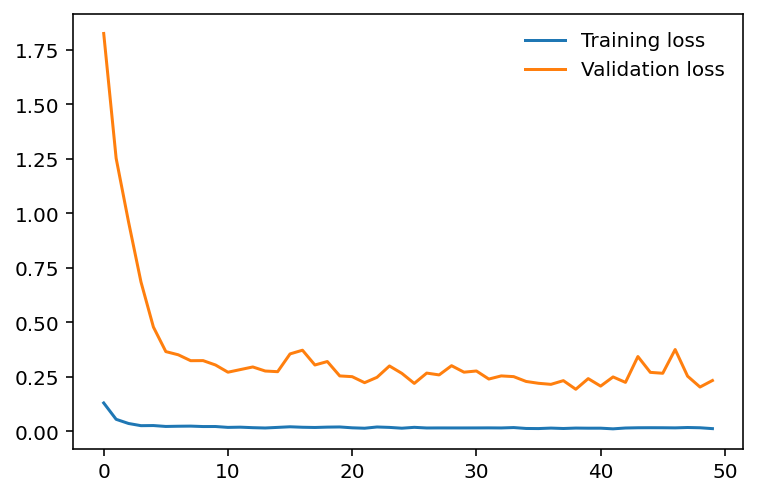

In [18]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()